## Quantum Half Adder

In [1]:
from qiskit import QuantumCircuit, Aer, assemble
from math import pi
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector as sv

In [2]:
def output_counts(quantum_circuit):
    sim = Aer.get_backend('qasm_simulator')
    q_object = assemble(quantum_circuit)
    return sim.run(q_object).result().get_counts()

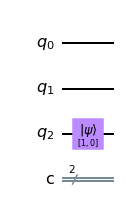

In [3]:
q_half_adder = QuantumCircuit(3, 2)
q_half_adder.initialize([1, 0], 2)
q_half_adder.draw("mpl")

$q_0$ and $q_1$ are the two inputs A and B of the circuit.

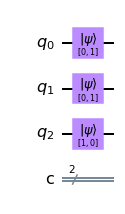

In [4]:
# setting random values to q_0 and q_1
q_half_adder.initialize([0, 1], 0)
q_half_adder.initialize([0, 1], 1) # adding A := 1 and B := 1
q_half_adder.draw("mpl")

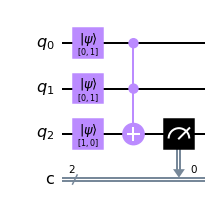

In [5]:
q_half_adder.ccx(0, 1, 2)
q_half_adder.measure(2, 0)
q_half_adder.draw("mpl")

The C-C-Not gate results in three qbits, $q_0$, $q_1$ and $(q_0 \wedge q_1) \oplus q_2$.
Because $q_2$ is always 0, the third output qbit simplifies to $(q_0 \wedge q_1)$, which is our carry.

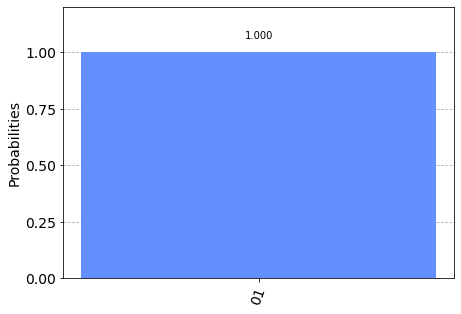

In [6]:
plot_histogram(output_counts(q_half_adder))

The LSB of the classical bit register will have the carry. With A := 1 and B := 1, the carry correctly is computed to be 1.

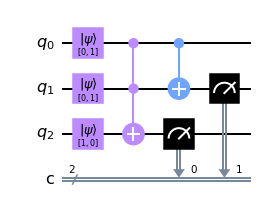

In [7]:
q_half_adder.cx(0, 1)
q_half_adder.measure(1, 1)
q_half_adder.draw("mpl")

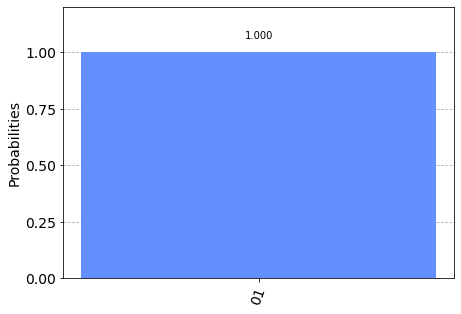

In [8]:
plot_histogram(output_counts(q_half_adder))

The MSB of the classical register holds the sum. With A := 1 and B := 1, the carry correctly is computed to be 0.

In [9]:
def quantum_half_adder(A=[1, 0], B=[1, 0]):
    q_half_adder = QuantumCircuit(3, 2)
    q_half_adder.initialize([1, 0], 2)
    q_half_adder.initialize(A, 0)
    q_half_adder.initialize(B, 1)
    q_half_adder.ccx(0, 1, 2)
    q_half_adder.measure(2, 0)
    q_half_adder.cx(0, 1)
    q_half_adder.measure(1, 1)
    return q_half_adder

Another run with A := 1 and B := 0

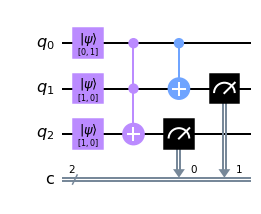

In [10]:
q_half_adder = quantum_half_adder([0, 1], [1, 0])
q_half_adder.draw("mpl")

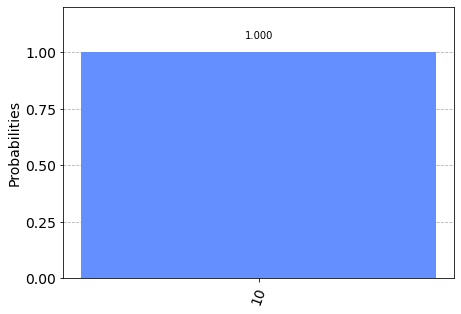

In [11]:
plot_histogram(output_counts(q_half_adder))

The MSB is 1, which is the sum of A and B and the LSB is zero which is the carry